In [6]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

# Define state

In [22]:
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str
    

In [23]:
def calculate_bmi(state: BMIState) -> BMIState:
    weight = state['weight_kg']
    height = state['height_m']
    
    bmi = weight / (height ** 2)
    
    state['bmi'] = round(bmi, 2)
    return state

In [24]:
def label_bmi(state:BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['category'] = 'Underweight'
    elif 18.5 <= bmi < 24.9:
        state['category'] = 'Normal weight'
    elif 25 <= bmi < 29.9:
        state['category'] = 'Overweight'
    else:
        state['category'] = 'Obesity'
    return state

# Define graph

In [25]:
graph = StateGraph(BMIState)

# add nodes
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

# add edges
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)

# compile the graph 
workflow = graph.compile()

In [45]:
# execute the graph
initial_state = {'weight_kg': 84, 'height_m': 1.84}
final_state = workflow.invoke(initial_state)

In [46]:
print(final_state)

{'weight_kg': 84, 'height_m': 1.84, 'bmi': 24.81, 'category': 'Normal weight'}


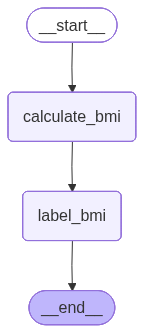

In [44]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

# LLM WORKFLOW

In [48]:
import os
from langchain.chat_models import init_chat_model
from dotenv import load_dotenv, find_dotenv
path = find_dotenv()
load_dotenv(path)

True

In [52]:
GEMINI_API_KEY = os.getenv("GOOGLE_API_KEY")

In [58]:
model = init_chat_model("google_genai:gemini-2.5-flash-lite", api_key = GEMINI_API_KEY)

In [59]:
class LLMState(TypedDict):
    question: str
    answer: str

In [69]:
def llm_qa(state: LLMState) -> LLMState:
    question = state['question']
    prompt = f'Answer the following question: {question}'
    response = model.invoke(prompt)
    state['answer'] = response.content
    return state

In [70]:
# Create graph
llm_graph = StateGraph(LLMState)

# add nodes
llm_graph.add_node('llm_qa', llm_qa)

# add edges
llm_graph.add_edge(START, 'llm_qa')
llm_graph.add_edge('llm_qa', END)

# compile the grpah
llm_workflow = llm_graph.compile()

In [71]:
input_state = {'question': 'how deep is the earth'}
final_state = llm_workflow.invoke(input_state)

In [72]:
print(final_state)

{'question': 'how deep is the earth', 'answer': 'The Earth isn\'t a solid object with a single depth in the way a pool is deep. Instead, it\'s a layered planet. When people ask "how deep is the Earth," they usually mean one of two things:\n\n1.  **How deep is the Earth\'s crust?**\n2.  **How deep is the Earth to its center?**\n\nLet\'s break both down:\n\n### 1. Depth of the Earth\'s Crust\n\nThe Earth\'s crust is the outermost solid shell. It\'s the part we live on and interact with directly. The depth of the crust varies significantly:\n\n*   **Oceanic Crust:** This is the thinner, denser crust found under the oceans. It\'s typically **5 to 10 kilometers (3 to 6 miles) thick.**\n*   **Continental Crust:** This is the thicker, less dense crust that makes up the continents. It can range from **30 to 70 kilometers (19 to 43 miles) thick.** The thickest parts are often found under mountain ranges.\n\nSo, the Earth\'s crust is relatively thin compared to the entire planet.\n\n### 2. Depth

# Visualize graph

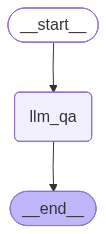

In [68]:
from IPython.display import Image
Image(llm_workflow.get_graph().draw_mermaid_png())

# Generate outline and generate blog

In [74]:
class BlogGenerator(TypedDict):
    topic: str
    outline: str
    content: str

In [75]:
def generate_outline(state: BlogGenerator) -> BlogGenerator:
    topic = state['topic']
    
    prompt = f'Generate an outline for a blog on the topic: {topic}'
    response = model.invoke(prompt).content
    
    state['outline'] = response
    return state

In [77]:
def generate_blog(state: BlogGenerator) -> BlogGenerator:
    title = state['topic']
    outline = state['outline']
    
    prompt = f'Write a detailed blog post titled "{title}" based on the following outline:\n{outline}'
    response = model.invoke(prompt).content
    
    state['content'] = response
    return state

In [78]:
generate_blog_graph = StateGraph(BlogGenerator)

# add node
generate_blog_graph.add_node('generate_outline', generate_outline)
generate_blog_graph.add_node('generate_content', generate_blog)

# add edges
generate_blog_graph.add_edge(START, 'generate_outline')
generate_blog_graph.add_edge('generate_outline', 'generate_content')
generate_blog_graph.add_edge('generate_content', END)

generate_blog_workflow = generate_blog_graph.compile()

In [79]:
input_state = {'topic': 'Impact of AI in Nepal'}
final_state = generate_blog_workflow.invoke(input_state)

In [82]:
print(final_state['content'])

## The Dawn of Intelligence: Impact of AI in Nepal

From revolutionizing healthcare in Silicon Valley to optimizing traffic in Tokyo, Artificial Intelligence is no longer a futuristic dream, but a present reality. But what does this technological tidal wave mean for a nation like Nepal, nestled in the heart of the Himalayas? As the world increasingly embraces intelligent machines, Nepal stands at a crucial juncture, poised to either leapfrog developmental hurdles or risk being left behind.

At its core, Artificial Intelligence (AI) refers to the simulation of human intelligence processes by machines, especially computer systems. These processes include learning (the acquisition of information and rules for using the information), reasoning (using rules to reach approximate or definite conclusions), and self-correction. It's about creating systems that can perceive their environment, make decisions, and take actions to achieve specific goals, often with a level of sophistication that mi